# Check when JRA55-do v1.5.0.1 changes from preliminary to final

See https://climate.mri-jma.go.jp/pub/ocean/JRA55-do/

In [1]:
import dask.array as da
import xarray as xr
import numpy as np
import glob
import os.path
import warnings
import matplotlib.pyplot as plt

In [2]:
import climtas.nci
climtas.nci.GadiClient(malloc_trim_threshold='64kib')

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 7
Total threads: 7,Total memory: 32.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:39295,Workers: 7
Dashboard: /proxy/8787/status,Total threads: 7
Started: Just now,Total memory: 32.00 GiB
Comm: tcp://127.0.0.1:43787,Total threads: 1
Dashboard: /proxy/41303/status,Memory: 4.57 GiB
Nanny: tcp://127.0.0.1:33041,


In [87]:
def checkvars(ftuple):
    dss = [ xr.open_dataset(fn, decode_times=True, engine='netcdf4') for fn in ftuple ]
    vs = [ list(ds.keys()) for ds in dss ]
    vs_uniq = { v for sublist in vs for v in sublist }
    fieldnames = { k for ds in dss for k in list(ds.keys()) if len(ds[k].shape) == 3 }
    if len(fieldnames) != 1:
        print('Mismatched fields!')
    fieldname = list(fieldnames)[0]
    fields = [ ds[fieldname] for ds in dss ]
    print(fieldname)
    fielddiffs = [ (f - fields[0])**2 for f in fields[1:] ]
    maxdiffs = [ f.max(dim=['lat','lon'], keep_attrs=True) for f in fielddiffs ]
    for ts in maxdiffs:
        plt.figure()
        ts.plot()
        plt.title(fieldname+ ' max squared difference')

In [90]:
files = [
    glob.glob('/g/data/ik11/inputs/JRA-55/JRA55-do-1-5-0-1/mirror/*/*/*/*/latest/*20230710*.nc'),
    glob.glob('/g/data/ik11/inputs/JRA-55/JRA55-do-1-5-0-1/mirror/*/*/*/*/latest/*20230713*.nc')
]
# files = [
#     glob.glob('/g/data/ik11/inputs/JRA-55/JRA55-do-1-5-0-1/mirror/*/*/*/*/latest/tas*20230710*.nc'),
#     glob.glob('/g/data/ik11/inputs/JRA-55/JRA55-do-1-5-0-1/mirror/*/*/*/*/latest/tas*20230713*.nc')
# ]
if len(set([len(f) for f in files])) > 1:
    print('Number of files differs!')
for f in files:
    f.sort()

files = zip(*files)

prra
prsn
rlds
rsds
huss
psl
tas
ts
uas
vas
friver
licalvf
tos
siconca
siconc


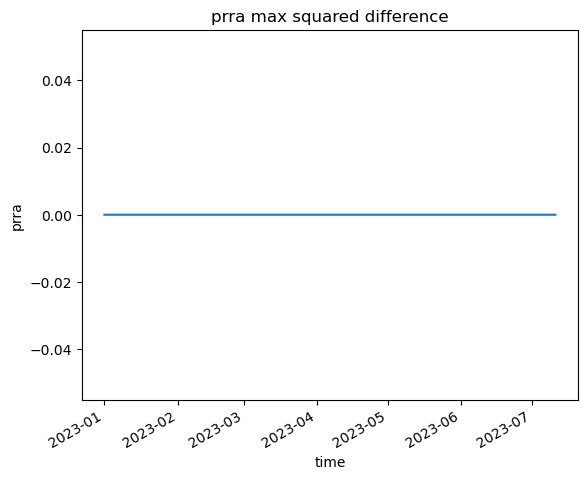

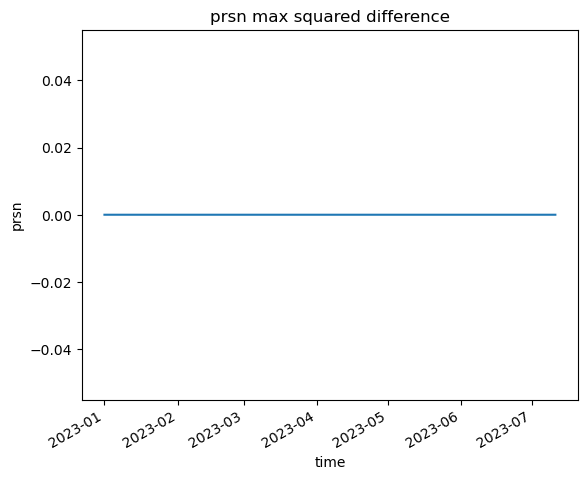

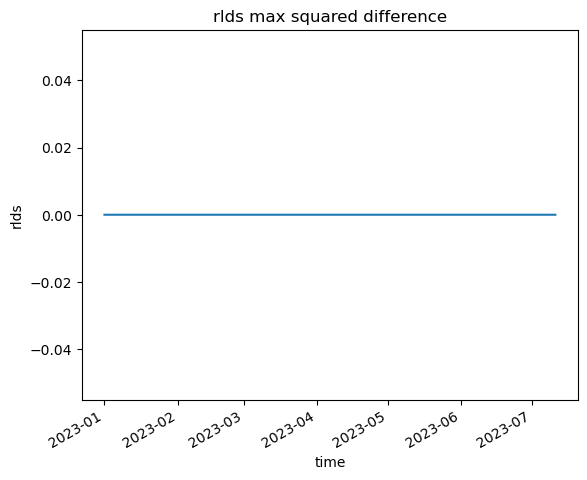

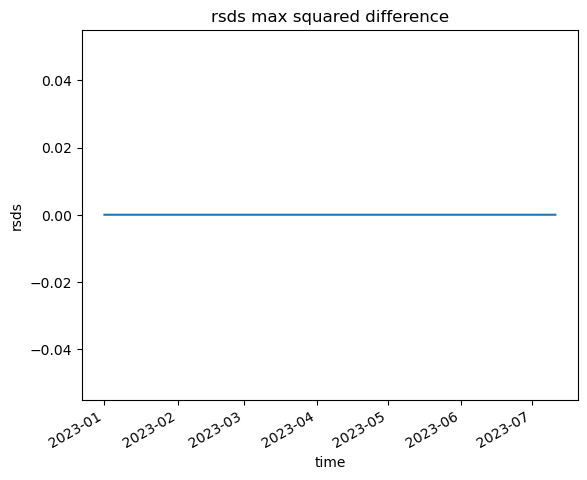

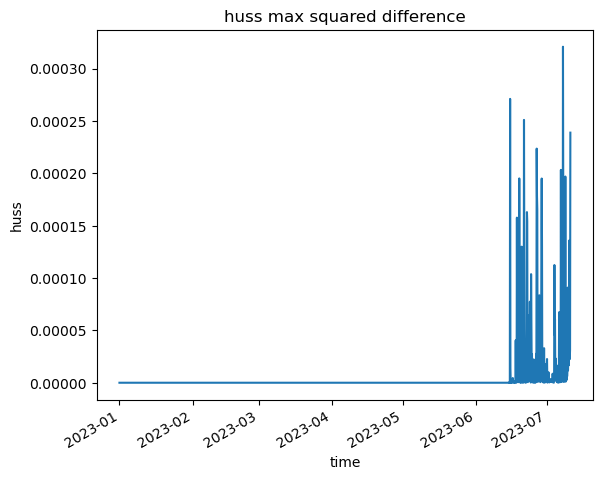

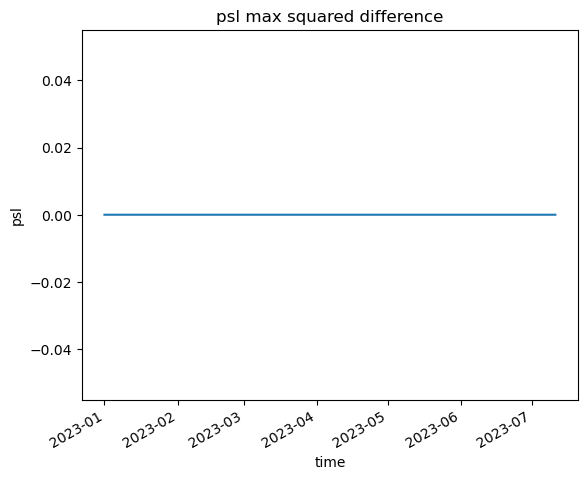

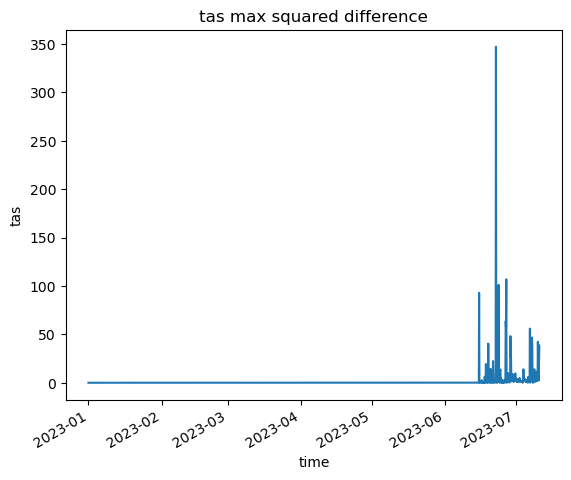

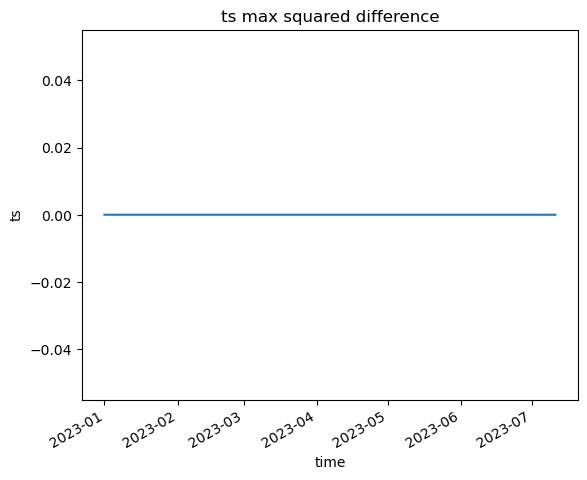

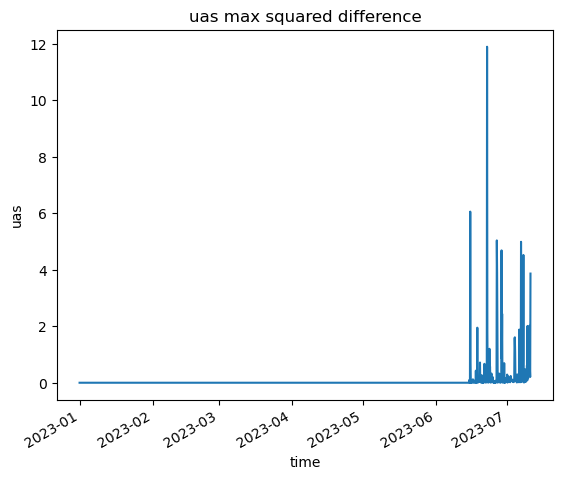

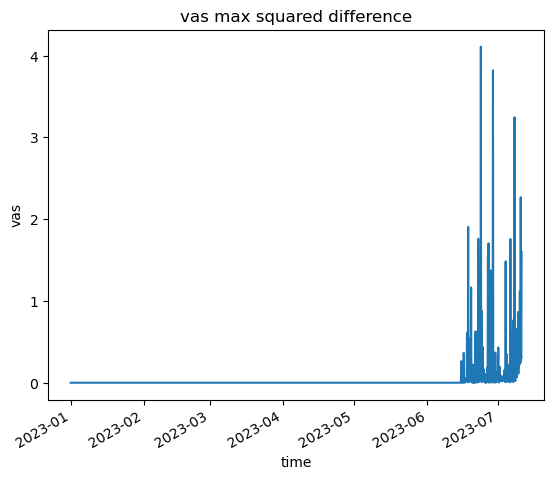

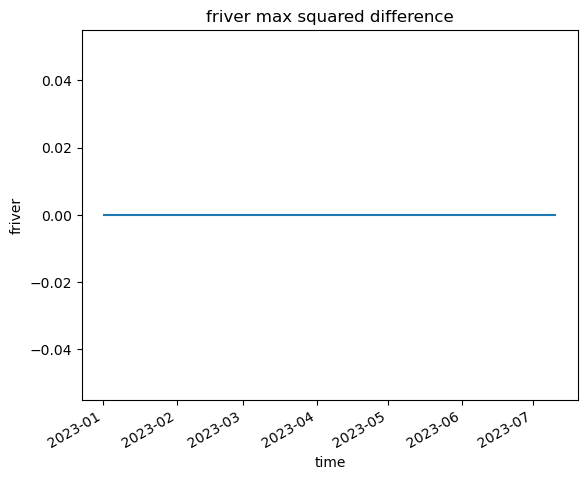

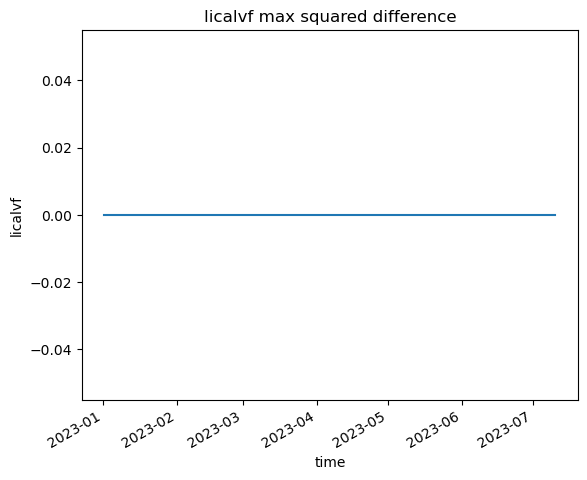

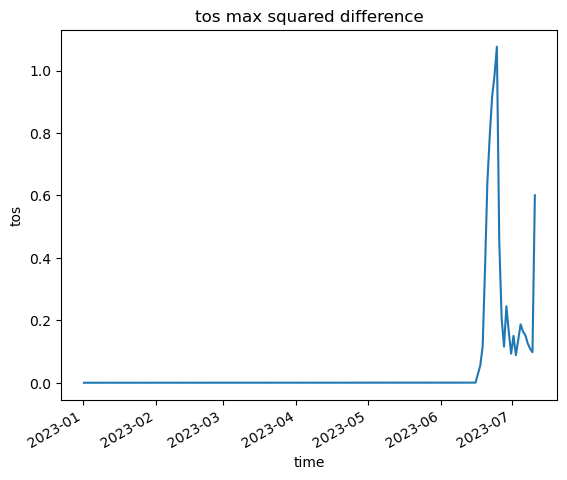

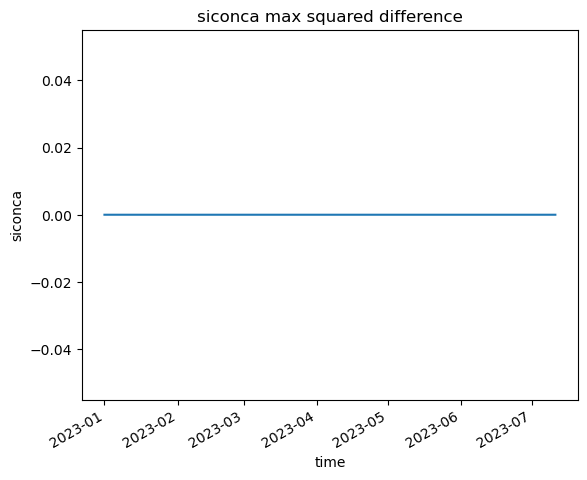

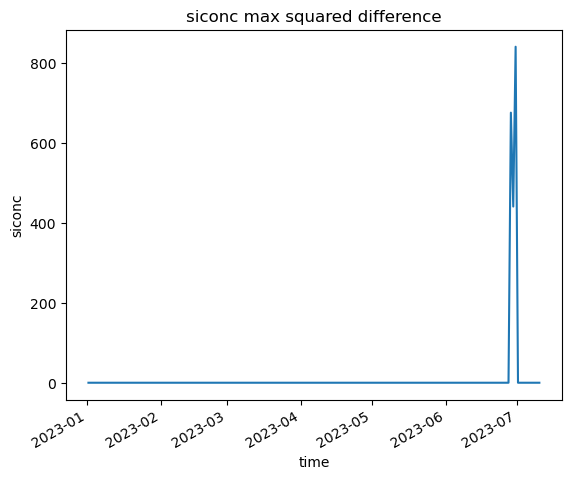

In [91]:
for ftuple in files:
    checkvars(ftuple)          